In [220]:
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [225]:
df = pd.read_csv("../data/adult.csv")

df = df[df["workclass"] != "?"]
df = df[df["occupation"] != "?"]
df = df[df["native-country"] != "?"]

df["salary"].unique()
df["salary K$"][df["salary K$"] < 20].unique()

array([15, 16, 18, 17, 19])

# Task 1
Print the count of men and women in the dataset.

In [226]:
df = pd.read_csv("../data/adult.csv")

# men count
print(f'men count {df["sex"][df["sex"] == "Male"].count()}')

# woman count
print(f'woman count {df["sex"][df["sex"] == "Female"].count()}')

men count 21790
woman count 10771


# Task 2
Find the average age of men in dataset

In [227]:
df = pd.read_csv("../data/adult.csv")

average_age_men = round(df["age"][df["sex"] == "Male"].mean(), 2)

average_age_men

39.43

# Task 3
Get the percentage of people from Poland (native-country)

In [228]:
df = pd.read_csv("../data/adult.csv")

from_poland = df["native-country"][df["native-country"] == "Poland"].count()

round(from_poland / df["native-country"].count() * 100, 5)

0.18427

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [231]:
df = pd.read_csv("../data/adult.csv")

df["age"][df["salary"] == ">50K"].mean()
df["age"][df["salary"] == ">50K"].std()

print(round(df["age"][df["salary"] == "<=50K"].mean(), 5))
print(round(df["age"][df["salary"] == "<=50K"].std(), 5))

36.78374
14.02009


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [233]:
df = pd.read_csv("../data/adult.csv")

df = df[~df["education"].isin(["Bachelors","Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]

df["salary"][df["salary"] == ">50K"].count()

3306

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [234]:
df = pd.read_csv("../data/adult.csv")
df.groupby(["education"]).describe()["age"]

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [235]:
df = pd.read_csv("../data/adult.csv")

married_man = df["salary K$"][df["marital-status"].str.startswith('Married')].mean()
non_married_man = df["salary K$"][~df["marital-status"].str.startswith('Married')].mean()

print(f"average salary married man {married_man}")
print(f"average salary non married man {non_married_man}")

average salary married man 105.98735162482973
average salary non married man 42.71762715818945


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [236]:
df = pd.read_csv("../data/adult.csv")

max_hours = df["hours-per-week"].max()

df["hours-per-week"][df["hours-per-week"] == max_hours].count()

85

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<AxesSubplot: >

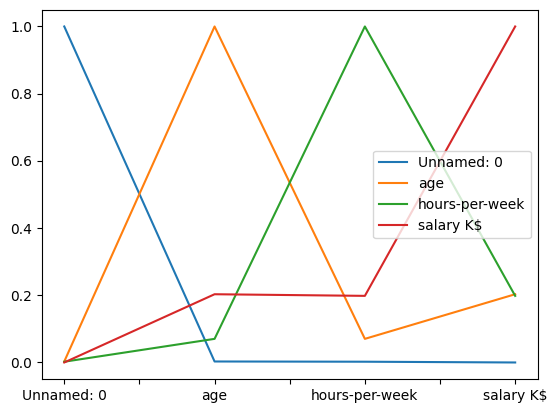

In [218]:
df = pd.read_csv("../data/adult.csv")

df.corr().plot()